<a href="https://colab.research.google.com/github/AnujVerma-hub/Facial-Emotion-Recognition/blob/main/Facial%20recognition%20using%20VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data


In [ ]:
!unzip '/content/drive/MyDrive/archive.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [ ]:
train_dir = '/content/train'

In [ ]:
test_dir = "/content/test"

test_datagen = ImageDataGenerator(rescale=1./255)



# Import Important Libraries

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow import keras
from keras.applications import VGG16
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras.models import Model, Sequential

print("classes:",os.listdir(train_dir))

classes: ['fear', 'surprise', 'disgust', 'sad', 'neutral', 'happy', 'angry']


# Data Preprocessing and Augmentation

In [ ]:
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.15,
                             shear_range=0.15,
                             horizontal_flip=True,
                             vertical_flip=True,
                             validation_split=0.2)
train_generator = datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=32,class_mode='categorical', shuffle=True, color_mode="rgb", subset="training")
val_generator = datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=32,class_mode='categorical', shuffle=True, color_mode="rgb", subset="validation")
images, labels = next(train_generator)
print("images shape:",images.shape)
print("labels shape",labels.shape)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
images shape: (32, 224, 224, 3)
labels shape (32, 7)


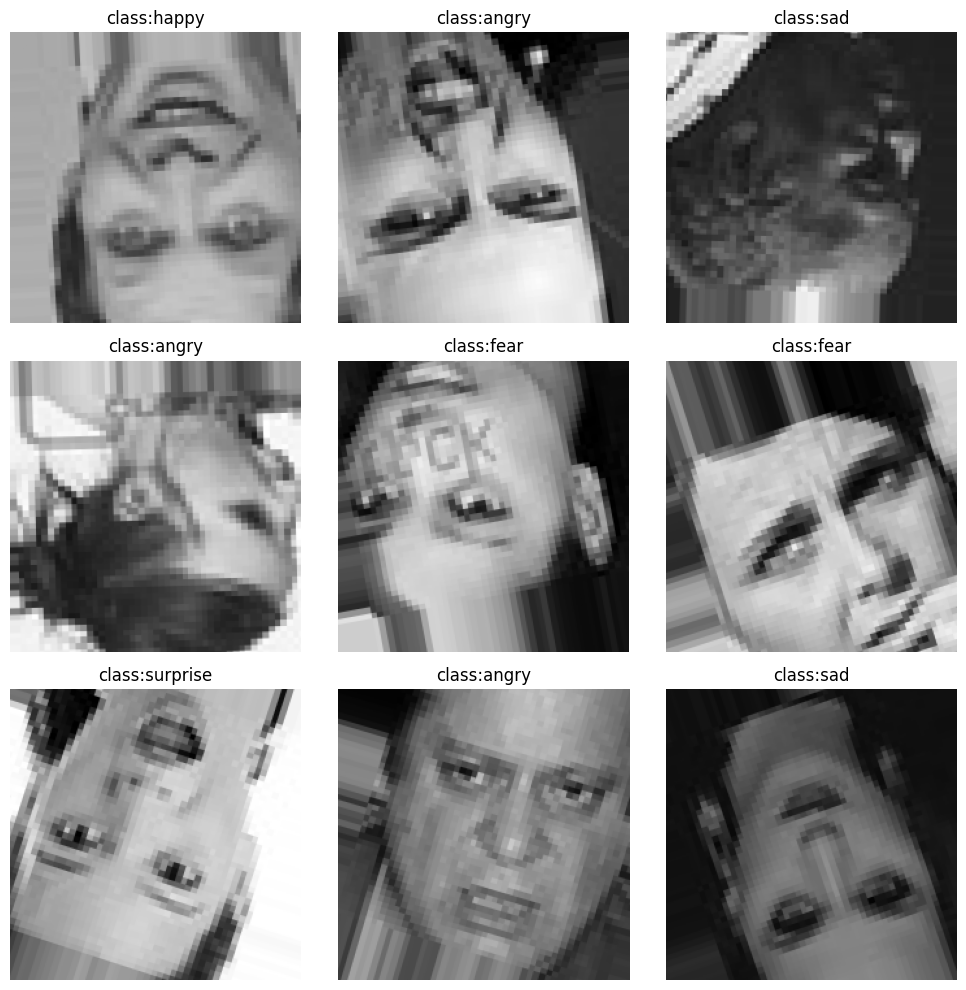

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(images[i])
  plt.title(f"class:{list(train_generator.class_indices.keys())[labels[i].argmax()]}")
  plt.axis("off")

plt.tight_layout()
plt.show()

# Implement VGG Model

In [ ]:
vgg = VGG16(input_shape=(224, 224, 3), include_top = False, weights = "imagenet")

for layer in vgg.layers[:-4]:
  layer.trainable = False

for (i, layer) in enumerate(vgg.layers):
  print(str(i)+ " " + layer.__class__.__name__, layer.trainable)

vgg.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D True
16 Conv2D True
17 Conv2D True
18 MaxPooling2D True


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [ ]:
def layers(bottom_model, num_classes):

  top_model = bottom_model.output
  top_model = GlobalAveragePooling2D()(top_model)
  top_model = Dense(1024, activation = "relu")(top_model)
  top_model = Dropout(0.5)(top_model)
  top_model = Dense(num_classes, activation= "softmax")(top_model)
  return top_model


from keras.models import Sequential, Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout

num_classes=7

head = layers(vgg, num_classes)

model = Model(inputs=vgg.input, outputs = head)

print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         7,175 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,247,175 (58.16 MB)

 Trainable params: 7,611,911 (29.04 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

None


# Model Training

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
es = EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights=True,verbose=1)
lr = ReduceLROnPlateau(monitor='val_accuracy', patience=3, factor=0.5, min_lr=1e-6, verbose=1)
callbacks = [es, lr]

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=1e-4,beta_1=0.9,beta_2=0.999,epsilon=1e-7)
model.compile(loss="categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])

In [ ]:
history = model.fit(train_generator,validation_data=val_generator,epochs=15,steps_per_epoch=len(train_generator),validation_steps=len(val_generator),callbacks=callbacks)

Epoch 1/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 397s 552ms/step - accuracy: 0.4673 - loss: 1.3899 - val_accuracy: 0.4997 - val_loss: 1.2876 - learning_rate: 1.0000e-04
Epoch 2/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 387s 538ms/step - accuracy: 0.5151 - loss: 1.2756 - val_accuracy: 0.5044 - val_loss: 1.2965 - learning_rate: 1.0000e-04
Epoch 3/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 386s 538ms/step - accuracy: 0.5409 - loss: 1.2111 - val_accuracy: 0.5330 - val_loss: 1.2175 - learning_rate: 1.0000e-04
Epoch 4/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 388s 540ms/step - accuracy: 0.5581 - loss: 1.1659 - val_accuracy: 0.5520 - val_loss: 1.1909 - learning_rate: 1.0000e-04
Epoch 5/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 384s 535ms/step - accuracy: 0.5723 - loss: 1.1285 - val_accuracy: 0.5645 - val_loss: 1.1476 - learning_rate: 1.0000e-04
Epoch 6/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 384s 534ms/step - accuracy: 0.5836 - loss: 1.0896 - val_accuracy: 0.5753 - val_loss: 1.1359 - learning_rate: 1.0000e-04
Epoch 7/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 

# Visualization

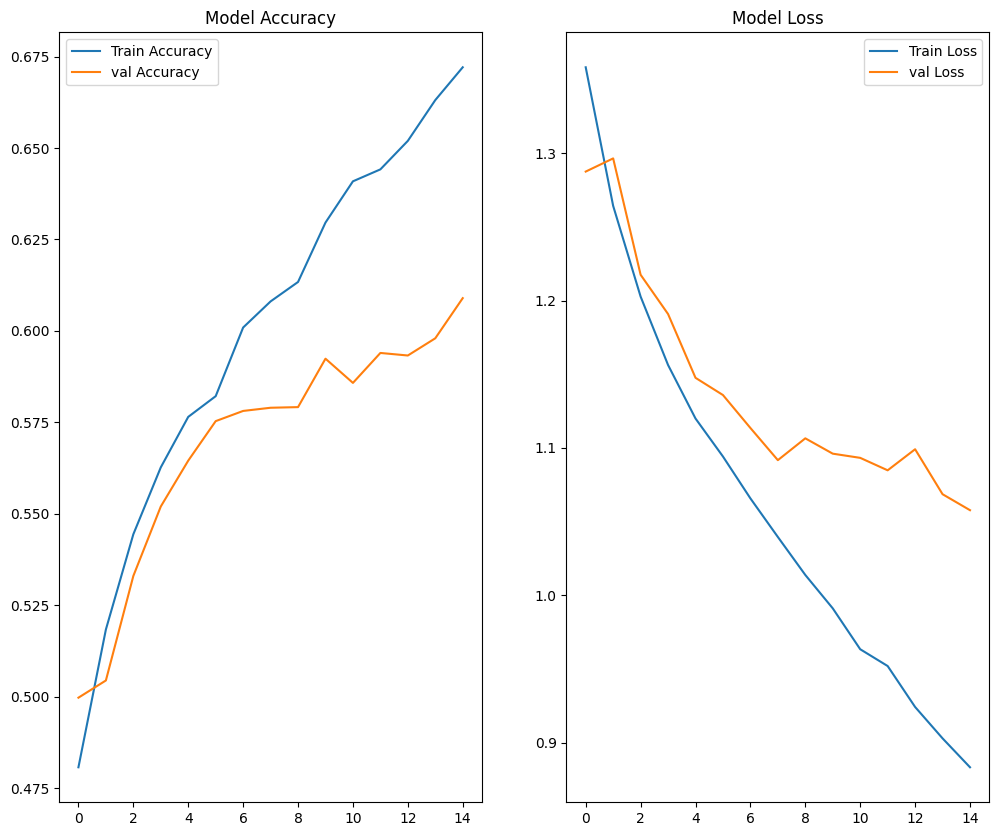

In [ ]:
plt.figure(figsize=(12,10))

#accuracy
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='val Accuracy')
plt.legend()
plt.title('Model Accuracy')

#loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='val Loss')
plt.legend()
plt.title('Model Loss')

plt.show()